**Model Training and Evaluation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Loading CLEANED dataset (day & hour)**

In [2]:
dfd = pd.read_csv("/content/day_feature_engineered.csv")
dfh = pd.read_csv("/content/hour_feature_engineered.csv")

In [3]:
dfd.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
dfh.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


**Function For Model Training And Evaluation**

In [32]:
def evaluate_models(df, label="Dataset"):
    X = df.drop("cnt", axis=1)
    y = df["cnt"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(random_state=42)
    }

    results = []
    predictions = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        pred = model.predict(X_test)

        # save predictions
        predictions[name] = pred

        rmse = np.sqrt(mean_squared_error(y_test, pred))
        mae = mean_absolute_error(y_test, pred)
        r2 = r2_score(y_test, pred)

        results.append([name, rmse, mae, r2])

    df_results = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R²"])

    print(f"===== Performance on {label} =====")
    print(df_results)

    return df_results, y_test, predictions

**Training Models on Daily Bike-Sharing Data(day.csv)**

**Evaluate Models**

In [45]:
results_day_df, y_day_test, preds_day = evaluate_models(dfd, "Day Dataset")

===== Performance on Day Dataset =====
               Model         RMSE          MAE        R²
0  Linear Regression  1270.864515  1075.671782  0.571180
1      Random Forest  1150.221452   968.181493  0.648731
2  Gradient Boosting  1153.643821   983.178799  0.646638


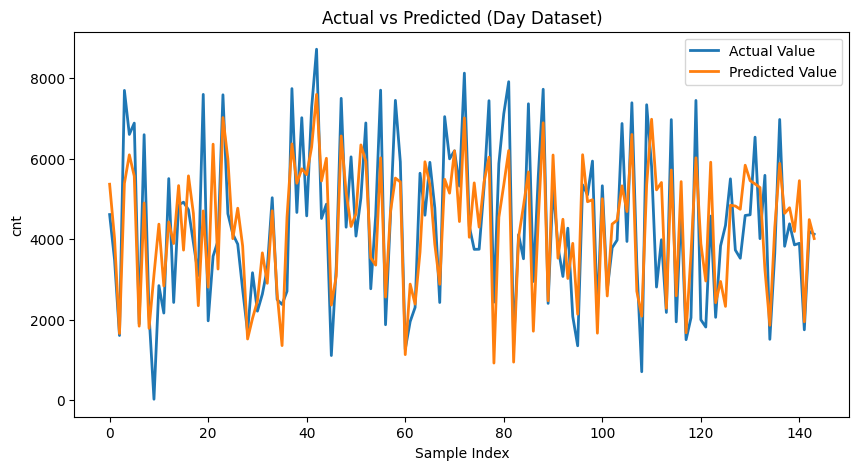

In [46]:
day_best_pred = preds_day["Random Forest"]

plt.figure(figsize=(10, 5))
plt.plot(y_day_test.values, label='Actual Value', linewidth=2)
plt.plot(day_best_pred, label='Predicted Value', linewidth=2)
plt.title('Actual vs Predicted (Day Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('cnt')
plt.legend()
plt.show()


**Comparison Table**

In [51]:
comparison_df = pd.DataFrame({
    "Actual (y_test)": y_day_test.values[:5],
    "Predicted (RF)": day_best_pred[:5]
})

print(comparison_df)


   Actual (y_test)  Predicted (RF)
0             4608        5361.610
1             3485        4008.155
2             1605        1653.325
3             7691        5383.180
4             6598        6091.280


**Training Models on Hourly Bike-Sharing Data(hour.csv)**

**Evaluate Models**

In [47]:
results_hour_df, y_hour_test, preds_hour = evaluate_models(dfh, "Hour Dataset")

===== Performance on Hour Dataset =====
               Model        RMSE        MAE        R²
0  Linear Regression  125.369475  95.037120  0.345402
1      Random Forest   57.164350  38.059765  0.863905
2  Gradient Boosting   72.725253  51.568180  0.779727


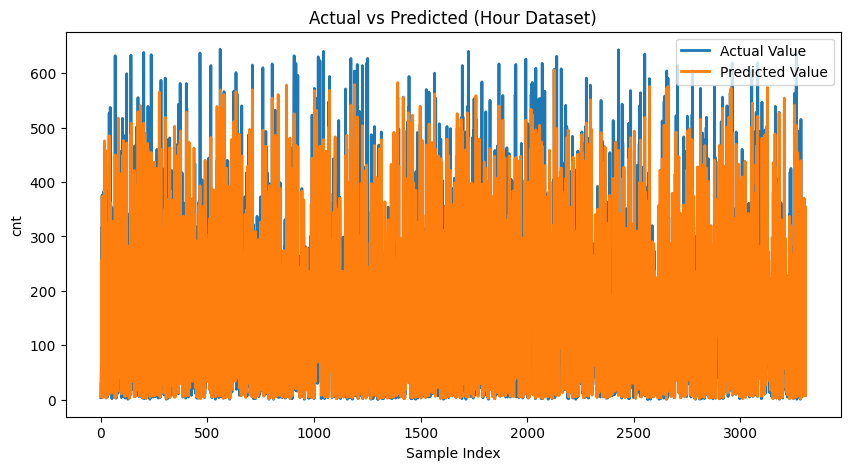

In [48]:
hour_best_pred = preds_hour["Random Forest"]

plt.figure(figsize=(10, 5))
plt.plot(y_hour_test.values, label='Actual Value', linewidth=2)
plt.plot(hour_best_pred, label='Predicted Value', linewidth=2)
plt.title('Actual vs Predicted (Hour Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('cnt')
plt.legend()
plt.show()


**Comparison Table**

In [52]:
comparison_df = pd.DataFrame({
    "Actual (y_test)": y_hour_test.values[:5],
    "Predicted (RF)": hour_best_pred[:5]
})

print(comparison_df)


   Actual (y_test)  Predicted (RF)
0                4           6.850
1               31          49.075
2               33          60.075
3               78         101.985
4              316         256.540


**Feature Importance**

In [14]:
def plot_feature_importance(df, dataset_name="Dataset", target_col="cnt"):
    """
    Trains a basic RandomForestRegressor and plots feature importance.
    """

    X = df.drop(target_col, axis=1)
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    feat_imp = pd.DataFrame({
        "Feature": X.columns,
        "Importance": rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=feat_imp, x="Importance", y="Feature")
    plt.title(f"Feature Importance ({dataset_name})")
    plt.show()


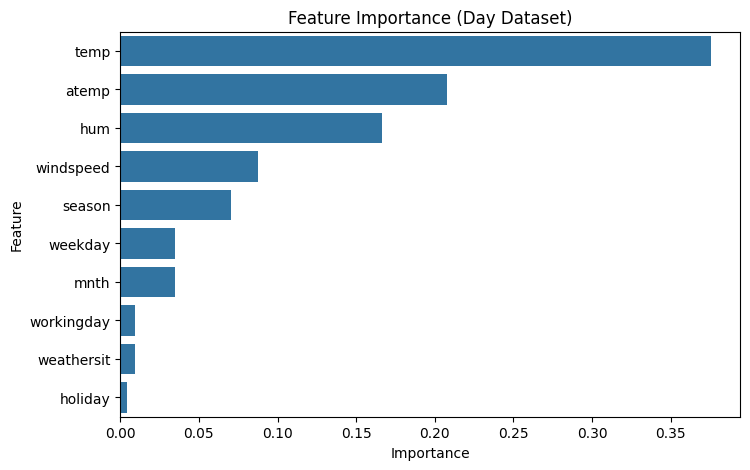

In [15]:
# Feature importance
plot_feature_importance(dfd, dataset_name="Day Dataset")

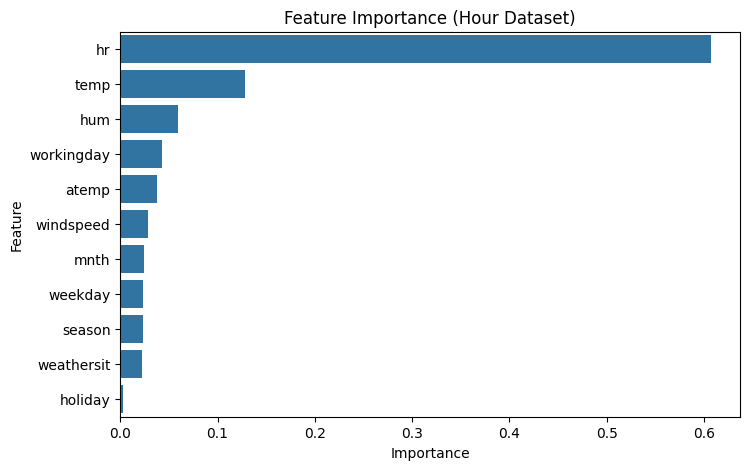

In [16]:
plot_feature_importance(dfh, dataset_name="Hour Dataset")

In [53]:
comparison_df = pd.DataFrame({
    "Dataset": ["Day", "Hour"],
    "Best Model": [
        results_day_df.loc[results_day_df["RMSE"].idxmin(), "Model"],
        results_hour_df.loc[results_hour_df["RMSE"].idxmin(), "Model"]
    ],
    "Best RMSE": [
        results_day_df["RMSE"].min(),
        results_hour_df["RMSE"].min()
    ]
})

print("== Dataset Comparison ===")
print(comparison_df)


== Dataset Comparison ===
  Dataset     Best Model    Best RMSE
0     Day  Random Forest  1150.221452
1    Hour  Random Forest    57.164350
